# Project 1: SAT & ACT Analysis




## Problem Statement

SAT and ACT, both are standardized tests that colleges and universities use as a benchmark when making admissions decisions. In this project, we're going to take a look at aggregate SAT and ACT scores and participation rates from each state in the United States. We'll seek to identify trends in the data and combine our data analysis with outside research to identify likely factors influencing participation rates and scores in various states. In the end, provide suggestion for how the College Board might increase participation rate.The tool we are going to use for this project is Jupyter Notebook.


## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
sat_2017 = pd.read_csv("../data/sat_2017.csv")
act_2017 = pd.read_csv("../data/act_2017.csv")


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
print(sat_2017.head(10))
print(act_2017.head(10))

                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The act_2017 contains 2017 ACT scores for different states in US. It include 7 variables with data size 52. The datatype for state is string and others are float.
The sat_2017 contains 2017 SAT scores for different states in US. It has 4 variables with data size 51. The datetype for states is string, for participation rate is float and others are integer.

#### 4a. Does the data look complete? 

Answer: United States has 50 states and a district. All cells are filled so the data is complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: 
For SAT, 
    The minimum possible value for Evidence-Based Reading and Writing is 200, and the maximun possible value is 800.
    The minimum possibel value for Math is 200, and the maximun possible value is 800. 
    The total value is from 400 to 1600.
For ACT,
    The minimum possible value for English, Math, Reading and Composite is 1, and the maximun possible value is 36.
    

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [4]:
#check errors for sat_2017
def check_sat(c):
    for i in sat_2017[c]:
        if float(i)<200 or float(i)>800:
            print(sat_2017[sat_2017.values == i])
    
check_sat('Evidence-Based Reading and Writing')
check_sat('Math')

#correcting the data
sat_2017 = sat_2017.replace(52,524) 





       State Participation  Evidence-Based Reading and Writing  Math  Total
20  Maryland           69%                                 536    52   1060


In [5]:
#check errors for act_2017
def check_act(c):
    for i in act_2017[c]:
        if float(i)<1 or float(i)>36:
            print(act_2017[act_2017.values == i])
            
check_act('English')
check_act('Math')
check_act('Reading')
check_act('Science')
#check_act('Composite')
#output: ValueError: could not convert string to float: '20.2x'

#correcting the data
act_2017 = act_2017.replace('20.2x','20.2')

#The science score for Maryland is 2.3
act_2017.loc[21,'Science'] = 23.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
#data type for sat_2017
print(sat_2017.dtypes)

#data type for act_2017
print(act_2017.dtypes)


State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Yes.
the type of participantion rates for both datasets and composite for act_2017 should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
#change participation rates to an appropriate numeric type
#remove %
sat_2017.Participation = sat_2017['Participation'].apply(lambda x : x.replace('%',''))
act_2017.Participation = act_2017['Participation'].apply(lambda x : x.replace('%',''))

#change data type
act_2017.Participation = act_2017.Participation.astype(float)
sat_2017.Participation = sat_2017.Participation.astype(float)

act_2017.Participation = act_2017.Participation.map(lambda x : x/100)
sat_2017.Participation = sat_2017.Participation.map(lambda x : x/100)


- Fix any individual values preventing other columns from being the appropriate type.

In [8]:
#The '20.2x' is fixed in 4c
#change data type for composite
act_2017.Composite = act_2017.Composite.astype(float)


- Finish your data modifications by making sure the columns are now typed appropriately.

In [9]:
def check_act(c):
    for i in act_2017[c]:
        if i<1 or i>36:
            print(act_2017[act_2017.values == i])
        
check_act('Composite')

- Display the data types again to confirm they are correct.

In [10]:
#data type for sat_2017
print(sat_2017.dtypes)

#data type for act_2017
print(act_2017.dtypes)

State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [11]:
#change column names for sat_2017 data
old_sat2017 = list(sat_2017.columns[1:])#exclude the state
new_sat2017 = [(i + '_sat_2017') for i in old_sat2017]
for i in range(len(old_sat2017)): 
    sat_2017 = sat_2017.rename(index = str, columns = {old_sat2017[i]:new_sat2017[i]})
sat_2017 = sat_2017.rename(str.lower, axis='columns')
sat_2017.columns = sat_2017.columns.map(lambda x : x.replace(' ','_'))

#change column names for act_2017 data
old_act2017 = list(act_2017.columns[1:])#exclude the state
new_act2017 = [(i + '_act_2017') for i in old_act2017]
for i in range(len(old_act2017)): 
    act_2017 = act_2017.rename(index = str, columns = {old_act2017[i]:new_act2017[i]})
act_2017 = act_2017.rename(str.lower, axis='columns')


In [12]:
print(sat_2017.columns)
print(act_2017.columns)

Index(['state', 'participation_sat_2017',
       'evidence-based_reading_and_writing_sat_2017', 'math_sat_2017',
       'total_sat_2017'],
      dtype='object')
Index(['state', 'participation_act_2017', 'english_act_2017', 'math_act_2017',
       'reading_act_2017', 'science_act_2017', 'composite_act_2017'],
      dtype='object')


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|States of U.S.|
|participation_sat_2017|float|SAT|The participation rate of SAT 2017|
|evidence-based_reading_and_writing_sat_2017|int|SAT|mean evidence-based reading and writing score for SAT 2017|
|math_sat_2017|int|SAT|mean math score for SAT 2017|
|total_sat_2017|int|SAT|mean total score for SAT 2017|
|participation_act_2017|float|ACT|The participation rate of ACT 2017|
|english_act_2017|float|ACT|mean english score for ACT 2017|
|math_act_2017|float|ACT|mean math score for ACT 2017|
|reading_act_2017|float|ACT|mean science score for ACT 2017|
|composite_act_2017|float|ACT|mean composite score for ACT 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [13]:
#the number of rows for dataframes
print(sat_2017.shape)
print(act_2017.shape)

#find the extra row
sat_state = list(sat_2017.state)
act_state = list(act_2017.state)
for i in sat_state:
    act_state.remove(i)
print(act_state)

#remove the extra National row for ACT
act_2017 = act_2017[act_2017.state != 'National']
act_2017.shape


(51, 5)
(52, 7)
['National']


(51, 7)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [14]:
combined_2017 = pd.merge(act_2017,sat_2017,how = "left",on = "state")

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [15]:
combined_2017.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [16]:
sat_2018 = pd.read_csv("../data/sat_2018.csv")
act_2018 = pd.read_csv("../data/act_2018.csv")

In [17]:
#basic information of data
print(sat_2018.shape)
print(act_2018.shape)
print(sat_2018.dtypes)
print(act_2018.dtypes)

#change type for participation
sat_2018.Participation = sat_2018['Participation'].apply(lambda x : x.replace('%',''))
act_2018.Participation = act_2018['Participation'].apply(lambda x : x.replace('%',''))

act_2018.Participation = act_2018.Participation.map(lambda x : float(x)/100)
sat_2018.Participation = sat_2018.Participation.map(lambda x : float(x)/100)

(51, 5)
(52, 7)
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object
State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [18]:
#data type
print(sat_2018.dtypes)
print(act_2018.dtypes)


State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


In [19]:
#change column names 
old_sat2018 = list(sat_2018.columns[1:])#exclude the state
new_sat2018 = [(i + '_sat_2018') for i in old_sat2018]
for i in range(len(old_sat2018)): 
    sat_2018 = sat_2018.rename(index = str, columns = {old_sat2018[i]:new_sat2018[i]})
sat_2018 = sat_2018.rename(str.lower, axis='columns')
sat_2018.columns = sat_2018.columns.map(lambda x : x.replace(' ','_'))

old_act2018 = list(act_2018.columns[1:])#exclude the state
new_act2018 = [(i + '_act_2018') for i in old_act2018]
for i in range(len(old_act2018)): 
    act_2018 = act_2018.rename(index = str, columns = {old_act2018[i]:new_act2018[i]})
act_2018 = act_2018.rename(str.lower, axis='columns')

In [20]:
#remove extra row
act_2018 = act_2018[act_2018.state != 'National']

In [21]:
#combine 2018 data
combined_2018 = pd.merge(act_2018,sat_2018,how = "left",on = "state")
combined_2018.to_csv('../data/combined_2018.csv')

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [22]:
final = pd.merge(combined_2017,combined_2018,how = "left",on = "state")
final.to_csv('../data/final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [23]:
overview = final.describe().T
overview


,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
english_act_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
math_act_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
reading_act_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
science_act_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
composite_act_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5
participation_sat_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
evidence-based_reading_and_writing_sat_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
math_sat_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
total_sat_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [24]:
def std1(a):
    s = 0
    for i in final[a]:
        s = np.square(i - overview.loc[a]['mean']) + s
    return np.sqrt(s/len(final[a]))
print(std1('math_sat_2018'))#using own formula
print(np.std(final.math_sat_2018))#numpy standard deviation
print(final.math_sat_2018.describe())#panda describe

48.582237044495976
48.582237044495976
count     51.000000
mean     557.039216
std       49.065654
min      480.000000
25%      520.000000
50%      547.000000
75%      600.500000
max      655.000000
Name: math_sat_2018, dtype: float64


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [25]:
sd = {k:std1(k) for k in overview.index}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer: The manually calculated standard deviation is same as using numpy's std. However, the standard deviation from pandas describe is bigger. The reason would be for the function and numpy's std method, they follow population standard deviation equation by default(the sum of square root is divided by n). As for pandas method, it is using sample standard deviation equation which divide the sum of square root by (n-1).

If we want to use numpy's std method to calculate sample standard deviation, we can use ddof = 1 in the method. ddof means Delta Degrees of Freedom. The divisor used in calculations is N - ddof, where N represents the number of elements.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [26]:
#the highest participation rates for SAT
final.sort_values(by = 'participation_sat_2017',ascending = False).head() 
#District of Columbia, Michigan, Connecticut and Delaware have the highest participation rate 1.00 for SAT 2017
final.sort_values(by = 'participation_sat_2018',ascending = False).head(10)
#Colorado, Connecticu, Delaware, Michigan and Idaho have the highest participation rate 1.00 for SAT 2018

#the lowest participation rates for SAT
final.sort_values(by = 'participation_sat_2017',ascending = True).head() 
#North Dakota, Mississippi and Iowa have the lowest participation rate 0.02 for SAT 2017
final.sort_values(by = 'participation_sat_2018',ascending = True).head()
#North Dakota has the lowest partocipation rate 0.02 for SAT 2018

#the highest participation rates for ACT
final.sort_values(by = 'participation_act_2017',ascending = False).head(20)
hpr_act2017 = list(final[final.participation_act_2017 == 1.00]['state'])
#17 states have the highest participation rate 1.00 for ACT 2017 are printed
final.sort_values(by = 'participation_act_2018',ascending = False).head(20)
hpr_act2018 = list(final[final.participation_act_2018 == 1.00]['state'])
#17 states have the highest participation rate 1.00 for ACT 2018 are printed

#the lowest participation rates for ACT
final.sort_values(by = 'participation_act_2017',ascending = True).head() 
#Maine has the lowest participation rate 0.08 for ACT 2017
final.sort_values(by = 'participation_act_2018',ascending = True).head()
#Maine has the lowest participation rate 0.07 for ACT 2018

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017,participation_sat_2017,evidence-based_reading_and_writing_sat_2017,math_sat_2017,...,participation_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018,composite_act_2018,participation_sat_2018,evidence-based_reading_and_writing_sat_2018,math_sat_2018,total_sat_2018
19,Maine,0.08,24.2,24.0,24.8,23.7,24.3,0.95,513,499,...,0.07,23.8,23.6,24.7,23.4,24.0,0.99,512,501,1013
39,Rhode Island,0.21,24.0,23.3,24.7,23.4,24.0,0.71,539,524,...,0.15,24.4,23.6,25.0,23.5,24.2,0.97,513,505,1018
29,New Hampshire,0.18,25.4,25.1,26.0,24.9,25.5,0.96,532,520,...,0.16,25.1,24.7,25.6,24.4,25.1,0.96,535,528,1063
7,Delaware,0.18,24.1,23.4,24.8,23.6,24.1,1.00,503,492,...,0.17,23.7,23.1,24.5,23.4,23.2,1.00,505,492,998
38,Pennsylvania,0.23,23.4,23.4,24.2,23.3,23.7,0.65,540,531,...,0.20,23.3,23.2,24.0,23.1,23.5,0.70,547,539,1086


|Feature|Year|State|Score|
|---|---|---|---|
|highest rate for SAT|2017|District of Columbia, Michigan, Connecticut and Delaware|1.00|
|highest rate for SAT|2018|Colorado, Connecticu, Delaware, Michigan and Idaho|1.00|
|lowest rate for SAT|2017|North Dakota, Mississippi and Iowa|0.02|
|lowest rate for SAT|2018|North Dakota|0.02|
|highest rate for ACT|2017|Alabama, Arkansas, Colorado, Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming|1.00|
|highest rate for ACT|2018|Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming|1.00|
|lowest rate for ACT|2017|Maine|0.08|
|lowest rate for ACT|2018|Maine|0.07|

The number of states with 100% participationt rates for ACT is larger than for SAT.
The lowest ACT participation rates  are higher than the lowest SAT participation rates both years.

In [27]:
#the highest mean total for SAT
final.sort_values(by = 'total_sat_2017',ascending = False)[['state','total_sat_2017']].head()
#Minnesota has the highest total 1295 for SAT 2017
final.sort_values(by = 'total_sat_2018',ascending = False)[['state','total_sat_2018']].head()
#Minnesota has the highest total 1298 for SAT 2018

#the lowest mean total for SAT 
final.sort_values(by = 'total_sat_2017',ascending = True)[['state','total_sat_2017']].head()
#District of Columbia has the lowest total 950 for SAT 2017
final.sort_values(by = 'total_sat_2018',ascending = True)[['state','total_sat_2018']].head()
#District of Columbia has the lowest total 977 for SAT 2018

#the highest mean composite for ACT
final.sort_values(by = 'composite_act_2017',ascending = False)[['state','composite_act_2017']].head()
#New Hampshire has the highest composite 25.5 for ACT 2017
final.sort_values(by = 'composite_act_2018',ascending = False)[['state','composite_act_2018']].head()
#Connecticut has the highest composite 25.6 for ACT 2018

#the lowest mean composite for ACT
final.sort_values(by = 'composite_act_2017',ascending = True)[['state','composite_act_2017']].head()
#Nevada has the lowest composite 17.8 for ACT 2017
final.sort_values(by = 'composite_act_2018',ascending = True)[['state','composite_act_2018']].head()
#Nevada has the lowest composite 17.7 for ACT 2018

final.loc[final.state.isin(['Minnesota','District of Columbia','New Hampshire','Connecticut','Nevada'])]\
[['state','total_sat_2017','total_sat_2018','composite_act_2017','composite_act_2018']]

,state,total_sat_2017,total_sat_2018,composite_act_2017,composite_act_2018
6,Connecticut,1041,1053,25.2,25.6
8,District of Columbia,950,977,24.2,23.6
23,Minnesota,1295,1298,21.5,21.3
28,Nevada,1116,1140,17.8,17.7
29,New Hampshire,1052,1063,25.5,25.1


|Feature|Year|State|Score|
|---|---|---|---|
|highest mean total score for SAT|2017|Minnesota|1295|
|highest mean total score for SAT|2018|Minnesota|1298|
|lowest mean total score for SAT|2017|District of Columbia|950|
|lowest mean total score for SAT|2018|District of Columbia|977|
|highest mean composite score for ACT|2017|New Hampshire|25.5|
|highest mean composite score for ACT|2018|Connecticut|25.6|
|lowest mean composite score for ACT|2017|Nevada|17.8|
|lowest mean composite score for ACT|2017|Nevada|17.7|

In [28]:
#100% participation for SAT
hpr_sat2017 = list(final[final.participation_sat_2017 == 1.00]['state'])
hpr_sat2018 = list(final[final.participation_sat_2018 == 1.00]['state'])
print('100% participation for SAT:',set(hpr_sat2017).intersection(hpr_sat2018))

#100% participation for ACT
print('100% participation for ACT:',set(hpr_act2017).intersection(hpr_act2018))


100% participation for SAT: {'Connecticut', 'Michigan', 'Delaware'}
100% participation for ACT: {'Utah', 'Wisconsin', 'North Carolina', 'Tennessee', 'Missouri', 'Oklahoma', 'Wyoming', 'South Carolina', 'Mississippi', 'Nevada', 'Kentucky', 'Montana', 'Alabama', 'Arkansas', 'Louisiana'}


For SAT, 3 states have 100% participation rates for both years.
For ACT, 15 states have 100% participation rates for both years

In [29]:
#50% participation for both tests
fiftyp_sat2017 = list(final[final.participation_sat_2017 > 0.50]['state'])
fiftyp_act2017 = list(final[final.participation_act_2017 > 0.50]['state'])
fiftyp_2017 = set(fiftyp_sat2017).intersection(fiftyp_act2017)

fiftyp_sat2018 = list(final[final.participation_sat_2018 > 0.50]['state'])
fiftyp_act2018 = list(final[final.participation_act_2018 > 0.50]['state'])
fiftyp_2018 = set(fiftyp_sat2018).intersection(fiftyp_act2018)


print('50% participation rates for both tests in 2017:',fiftyp_2017)
print('50% participation rates for both tests in 2018:',fiftyp_2018)
final.loc[final['state'].isin(['South Carolina', 'North Carolina'])]\
[['state','participation_sat_2017','participation_sat_2018','participation_act_2017','participation_act_2018']]

50% participation rates for both tests in 2017: {'Hawaii', 'Georgia', 'Florida'}
50% participation rates for both tests in 2018: {'Florida', 'South Carolina', 'Hawaii', 'Georgia', 'North Carolina'}


,state,participation_sat_2017,participation_sat_2018,participation_act_2017,participation_act_2018
33,North Carolina,0.49,0.52,1.0,1.0
40,South Carolina,0.50,0.55,1.0,1.0


The SAT 2017 paticipaiton rates for North Carolina and South Carolina were increased.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(0.5, 0.98, 'Correlations between all features')

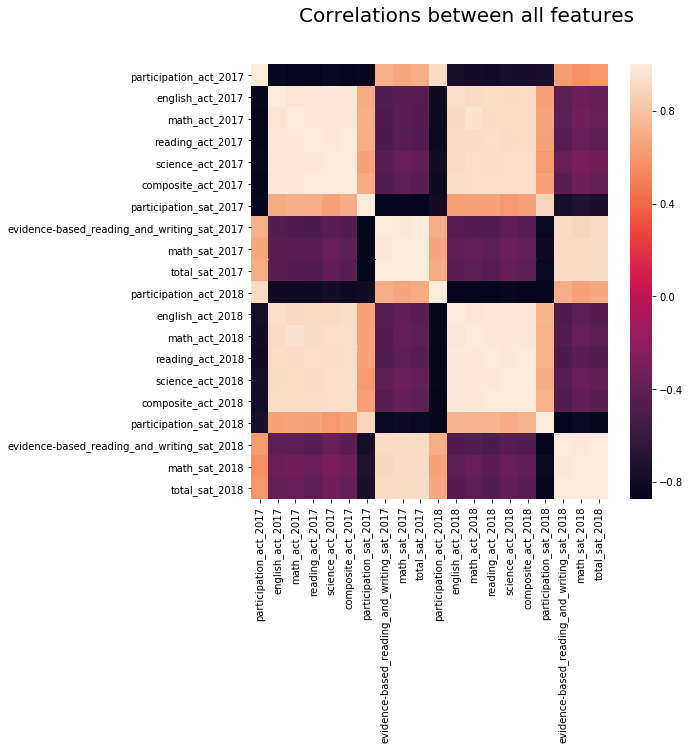

In [30]:
final.corr()

plt.figure(figsize=(8,8))
sns.heatmap(final.corr())
plt.suptitle('Correlations between all features',size = 20)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [31]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,8)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        # feel free to add more settings
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_title(list_of_titles[i])
        plt.subplots_adjust(wspace = 0.5,hspace = 0.5)
        ax[i].hist(dataframe[column]) 
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

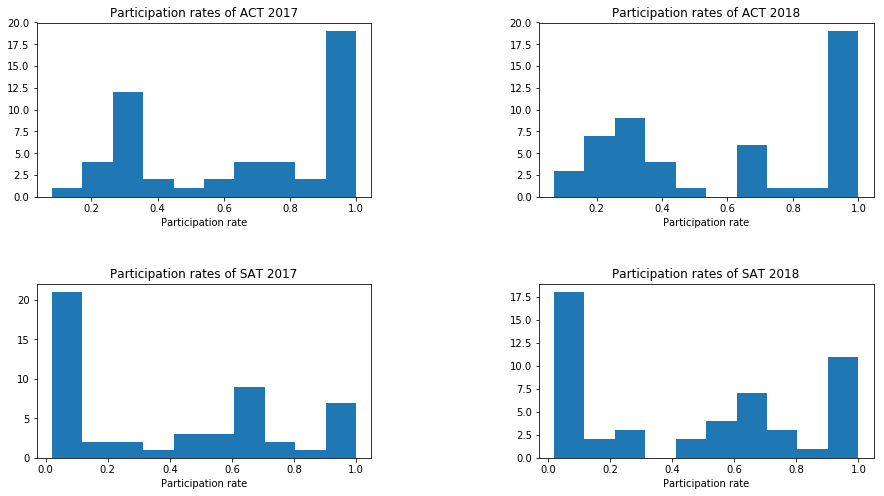

In [32]:
# Participation rates for SAT & ACT
subplot_histograms(final,['participation_act_2017','participation_act_2018','participation_sat_2017',
                          'participation_sat_2018'],['Participation rates of ACT 2017',
                          'Participation rates of ACT 2018','Participation rates of SAT 2017',
                          'Participation rates of SAT 2018'],4*['Participation rate'])

Most of states have 90%-100% participation rates for ACT.
Most of states have 0-10% participation rates for SAT. 
Based on the shape of plots, the participation rates for both tests are not likely to be normally distributed.

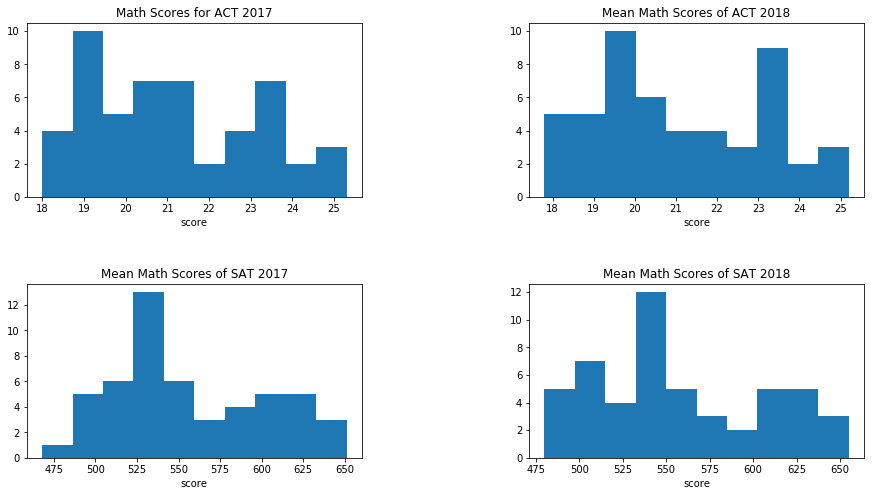

In [33]:
#Math scores for SAT & ACT
subplot_histograms(final,['math_act_2017','math_act_2018','math_sat_2017',
                          'math_sat_2018'],['Math Scores for ACT 2017',
                          'Mean Math Scores of ACT 2018','Mean Math Scores of SAT 2017',
                          'Mean Math Scores of SAT 2018'],4*['score'])

The plots for ACT math scores are look like bimodal distribution, especially for 2018.The graphs for SAT are more bell-shaped compare to ACT's. 

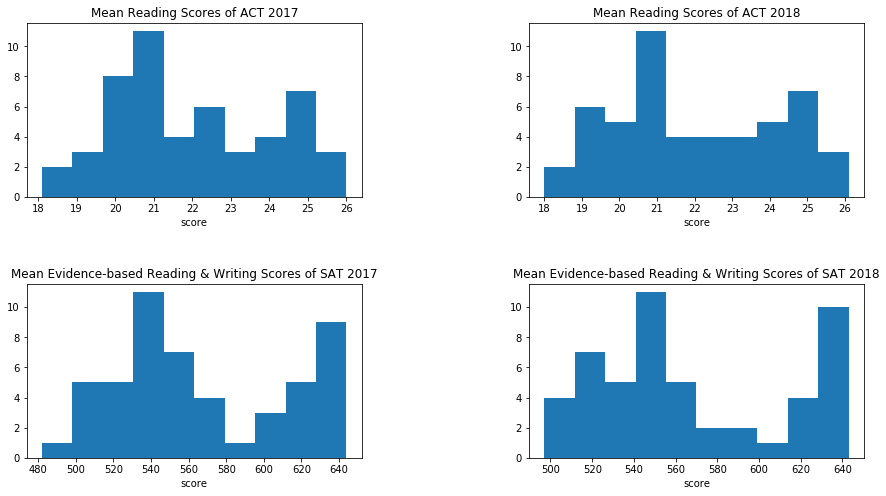

In [34]:
#Reading/verbal scores for SAT & ACT
subplot_histograms(final,['reading_act_2017','reading_act_2018','evidence-based_reading_and_writing_sat_2017',
                          'evidence-based_reading_and_writing_sat_2018'],['Mean Reading Scores of ACT 2017',
                          'Mean Reading Scores of ACT 2018','Mean Evidence-based Reading & Writing Scores of SAT 2017',
                          'Mean Evidence-based Reading & Writing Scores of SAT 2018'],4*['score'])

The graphs for ACT are more bell-shaped compare to SAT's.
Both histograms for SAT show two different modes in the range of 530-540 and 630-640.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT vs. ACT math scores for 2017')

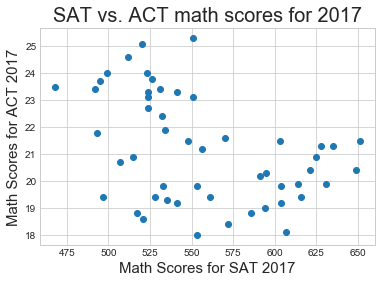

In [35]:
plt.style.use('seaborn-whitegrid')
# SAT vs. ACT math scores for 2017
plt.scatter(final.math_sat_2017,final.math_act_2017)
plt.xlabel('Math Scores for SAT 2017',size = 15)
plt.ylabel('Math Scores for ACT 2017',size = 15)
plt.title('SAT vs. ACT math scores for 2017',size = 20)

From the scatterplot, we can observe a week negative correlation between SAT and ACT math scores for 2017.

Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores for 2017')

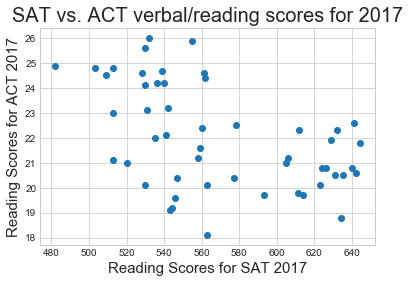

In [36]:
#SAT vs. ACT verbal/reading scores for 2017
plt.style.use('seaborn-whitegrid')
plt.scatter(final['evidence-based_reading_and_writing_sat_2017'],final.reading_act_2017)
plt.xlabel('Reading Scores for SAT 2017',size = 15)
plt.ylabel('Reading Scores for ACT 2017',size = 15)
plt.title('SAT vs. ACT verbal/reading scores for 2017',size = 20)

From the scatterplot, we can observe a week negative correlation between SAT and ACT verbel/reading scores for 2017.

Text(0.5, 1.0, 'SAT vs. ACT total/composite scores for 2017')

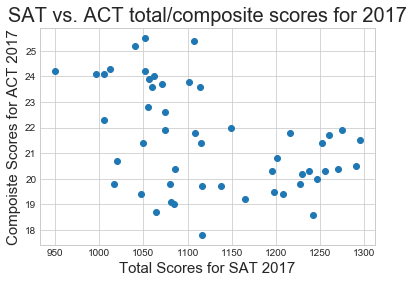

In [37]:
#SAT vs. ACT total/composite scores for 2017
plt.style.use('seaborn-whitegrid')
plt.scatter(final.total_sat_2017,final.composite_act_2017)
plt.xlabel('Total Scores for SAT 2017',size = 15)
plt.ylabel('Compoiste Scores for ACT 2017',size = 15)
plt.title('SAT vs. ACT total/composite scores for 2017',size = 20)

From the scatterplot, we can observe a week negative correlation between SAT and ACT total/composite scores for 2017.

Text(0.5, 1.0, 'Total scores for SAT 2017 vs. 2018')

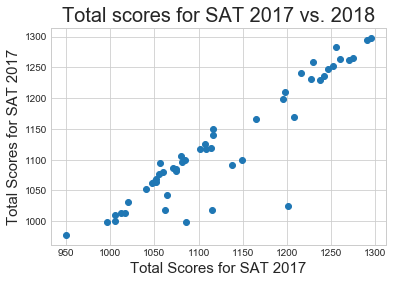

In [38]:
#Total scores for SAT 2017 vs. 2018
plt.style.use('seaborn-whitegrid')
plt.scatter(final.total_sat_2017,final.total_sat_2018)
plt.xlabel('Total Scores for SAT 2017',size = 15)
plt.ylabel('Total Scores for SAT 2017',size = 15)
plt.title('Total scores for SAT 2017 vs. 2018',size = 20)

From the scatterplot, we can observe a strong positive correlation between total scores for SAT 2017 and 2018.

Text(0.5, 1.0, 'Composite scores for ACT 2017 vs. 2018')

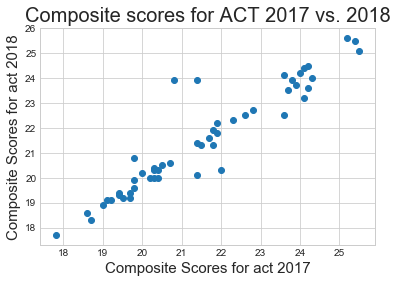

In [39]:
#Composite scores for ACT 2017 vs. 2018
plt.style.use('seaborn-whitegrid')
plt.scatter(final.composite_act_2017,final.composite_act_2018)
plt.xlabel('Composite Scores for act 2017',size = 15)
plt.ylabel('Composite Scores for act 2018',size = 15)
plt.title('Composite scores for ACT 2017 vs. 2018',size = 20)

From the scatterplot, we can observe a strong positive correlation between composite scores for ACT 2017 and 2018.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'Scores for ACT 2018')

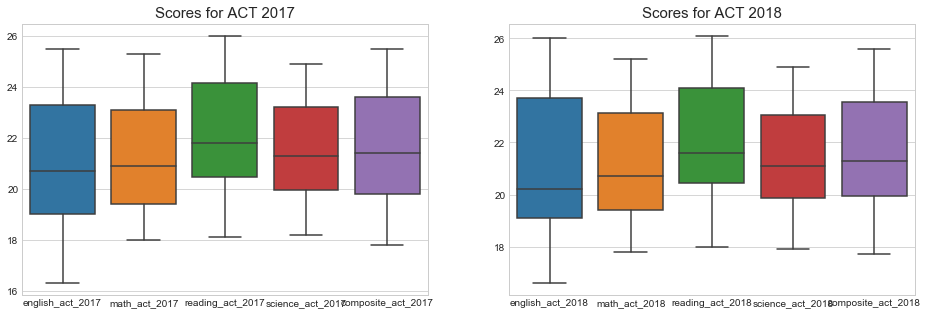

In [40]:
# boxplots for ACT scores 
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(16,5))
sns.boxplot(data = final[final.columns[2:7]],ax=ax[0]).set_title('Scores for ACT 2017',size = 15)
sns.boxplot(data = final[final.columns[12:17]],ax = ax[1]).set_title('Scores for ACT 2018',size = 15)


No outlier.
The boxplots for reading scores are higher than other, and plots for english scores are taller.

Text(0.5, 1.0, 'Total scores for SAT')

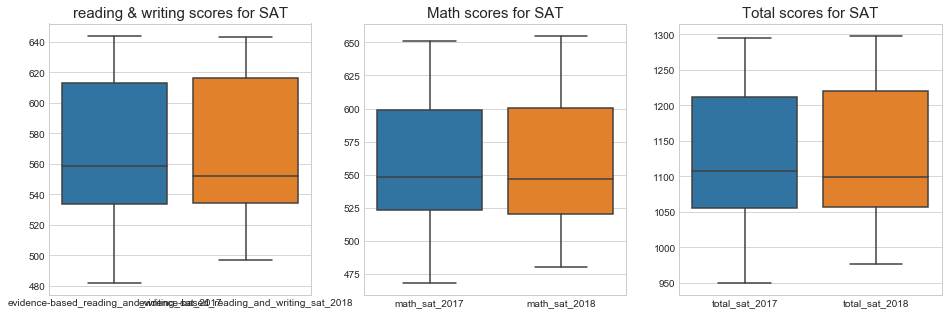

In [41]:
# boxplots for SAT scores 
fig, ax = plt.subplots(nrows = 1, ncols = 3,figsize=(16,5))
sns.boxplot(data = final[['evidence-based_reading_and_writing_sat_2017',
                          'evidence-based_reading_and_writing_sat_2018']],ax=ax[0]).set_title('reading & writing scores for SAT',size = 15)
sns.boxplot(data = final[["math_sat_2017","math_sat_2018"]],ax = ax[1]).set_title('Math scores for SAT',size = 15)
sns.boxplot(data = final[["total_sat_2017","total_sat_2018"]],ax = ax[2]).set_title('Total scores for SAT',size = 15)

No outlier.
Compare all the histogram between two years, the minimum scores for both reading and math for 2017 is lower than 2018. 
And the histograms of math scores are taller than reading & writing scores. It suggests states have more different math scores.

Text(0.5, 1.0, 'Participation rate for SAT')

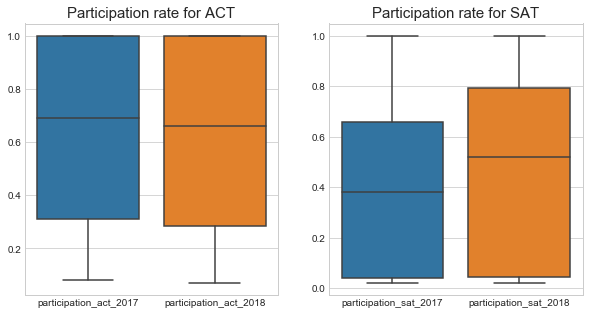

In [42]:
# boxplots for participation rate 

fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize=(10,5))
sns.boxplot(data = final[['participation_act_2017','participation_act_2018']],ax=ax[0]).set_title('Participation rate for ACT',size = 15)
sns.boxplot(data = final[['participation_sat_2017','participation_sat_2018']],ax = ax[1]).set_title('Participation rate for SAT',size = 15)

No outlier.
Most of states have 100% participation rate for ACT, while many stats have participation rates around 0%.
The median of SAT participation rates are lower than ACT.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

Text(0.5, 0.98, 'Participation rates vs composite/total scores')

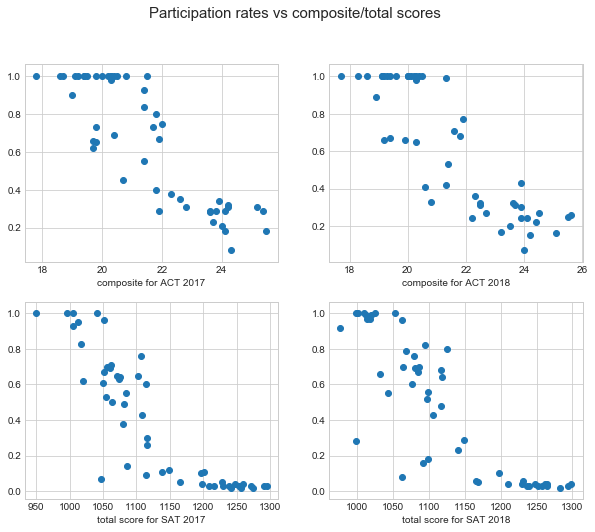

In [43]:
#discover the correlation between participation rate and total/composite score using scattring plots
fig, ax = plt.subplots(nrows = 2, ncols = 2,figsize=(10,8))

ax[0][0].scatter(final.composite_act_2017,final.participation_act_2017)
ax[0][0].set_xlabel('composite for ACT 2017',size = 10)
ax[0][1].scatter(final.composite_act_2018,final.participation_act_2018)
ax[0][1].set_xlabel('composite for ACT 2018',size = 10)
ax[1][0].scatter(final.total_sat_2017,final.participation_sat_2017)
ax[1][0].set_xlabel('total score for SAT 2017',size = 10)
ax[1][1].scatter(final.total_sat_2018,final.participation_sat_2018)
ax[1][1].set_xlabel('total score for SAT 2018',size = 10)
plt.suptitle('Participation rates vs composite/total scores',size = 15)


From the scatterplots, we can dicover a moderate negetive correlation between participation rate and composite/total scores. In other words, states have lower participation rated tend to have higher total/composite scores for test.

This is because raw scores are confounded with participation rates. For example, the best SAT students in any state tend to be the most aggressive about wanting to take the test.

Therefore, if a state’s SAT participation is low, the state will only have the best students taking it, making the score artificially high. Likewise, if a state requires the SAT, it will have 100% participation but also include the worst SAT takers, making the score artificially low.  


#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [44]:
final.describe().T[['mean','50%','75%','max']]

,mean,50%,75%,max
participation_act_2017,0.652549,0.69,1.000,1.0
english_act_2017,20.931373,20.70,23.300,25.5
math_act_2017,21.182353,20.90,23.100,25.3
reading_act_2017,22.013725,21.80,24.150,26.0
science_act_2017,21.450980,21.30,23.200,24.9
composite_act_2017,21.519608,21.40,23.600,25.5
participation_sat_2017,0.398039,0.38,0.660,1.0
evidence-based_reading_and_writing_sat_2017,569.117647,559.00,613.000,644.0
math_sat_2017,556.882353,548.00,599.000,651.0
total_sat_2017,1126.098039,1107.00,1212.000,1295.0


In [45]:
from scipy.stats import shapiro
#nomality test for 2017
stat, p = shapiro(final.participation_act_2017)
print('Statistics=%.3f, p=%.10f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample is normally distributed')
else:
    print('Sample is not normally distributed')
    
#nomality test for 2018
stat, p = shapiro(final.participation_act_2018)
print('Statistics=%.3f, p=%.10f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Sample is normally distributed')
else:
    print('Sample is not normally distributed')

Statistics=0.840, p=0.0000069784
Sample is not normally distributed
Statistics=0.826, p=0.0000030171
Sample is not normally distributed


Answers: From the table above, we find out the means and medians for most of variables are close, so they are not skewed. And we can assume them to be normally distributed. 
However, the ACT participation rates for many stats are 1.00. We run normality tests and conclude the samples are not normally distributed.

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Yes, most samples are normally distributed. However, some samples like participation rates for act and sat are not normally distributed.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: From histograms for Math, Reading and Participation rates above, we can see the plots for sat math and act reading are more bell-shaped compare to others, so the distributions are more normal. For sat reading and act math, histograms show two modes. So we may increase the datasize to get better estimations for population. As for participation rates, the sat plot has mode around 0.0 and act plot has mode 1.0. Also base on the normality test, the p-value is very small and we conclude the samples are not normally distributed. 

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: It does not make sense to conduct statistical inference as this data set does not capture the individual test score of the states. If we do a comparison based on this set, all states are given equal weightages, which is incorrecrt because they have very different populations.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer: No. 
For most of states, the values for participation rates for SAT and ACT are very different. And only about 10 states' sum of two test participation rates greater than 110, it means the number of students that take both tests are not large. In other words, the intersection of two samples are not that much. Moreover, it could be the reason why there is an unexpected weak correlation between SAT and ACT math.
Since the samples for SAT and ACT are different in each state, it is not appropriate to compare these specific SAT and ACT math scores.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).


From 2017 to 2018, Illinois's ACT participation rates is decreased by 0.5, but SAT participation rate is increased by 0.9. So overall, it has a highest growth rate 0.4 on participating tests. In fact, Illinois had a new contatct in the end of 2016 with college board and decided to bring SAT to public high schools. The reason of changing from ACT to SAT is they thought SAT was better aligned with standards for what students should know in Illinois. Also, Illinois covered the cost of the SAT for all their public school students, which leads to a big increase on participation rate for college entrance exam.

Besides Illinois, Colorado also has a decrease on ACT participation rates(-0.7) and an increase on SAT(+0.89). However, the overall paticipation rate is increased by 0.19. The data suggest that a large amount of graduating seniors take SAT instead of ACT. Same as Illinois, Colorado also has a new contract with SAT. But because the original overall participation rate is higher compare to Illinois, there is no significant growth on overall rate.

Base on the boxplots of participation rate, we can observe a small decrese on ACT participation rate and an increase on SAT participation. Overall, the 2018 test participation rates for most states are higher than 2017. However, it is not happened in Alaska. In 2018, the ACT participation rate is drop from 0.65 to 0.33, and the SAT rate is only increased by 0.05. Based on Graduation and Dropout Rates in Alaska Fact sheet, a valid score on a College and Career Ready Assessment (CCRA) was removed as a graduation requirement on June 30, 2016. It means students are able to get diploma without attending any test. 

## Conclusions and Recommendations

Based on your exploration of the data, what are your key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Based on your exploration of the data,  overall the participation rats for ACT are higher than SAT. However, for some of states, the participation rates for SAT is increased from 2017 to 2018. 

A big predictor of ACT/SAT participation rates is whether a college entrance exam is mandated by the state. And whether SATs are preferred over ACTs or vice versa depends on whether (1) it is recommended by the state, as in the case of Illinois or (2) there is sponsorship of the fees, as in the case of Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia.

In the case of North Dakota, it has 98% participation rate for ACT but the lowest rate for SAT. The College Board could negotiate a new contract with North Dakota government and make SAT free for high school graduating student. 


## Data Source

https://www.edweek.org/ew/articles/2018/10/31/sat-scores-rise-as-number-of-test-takers.html
https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate
https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html